### Student Information
Name: 鄭家合 TEE JIA HE

Student ID: 110033405

GitHub ID: AnthonyTeeJH

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

### First Part: Take Home Exercises ###

from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
# convert target into target_name
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


In [2]:
# Exercise 2 (take home): Experiment with other querying techniques using pandas dataframes.

# pandas.DataFrame.query
X.query("category_name == 'comp.graphics'")

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
...,...,...,...
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,1,comp.graphics
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics


In [3]:
# Exercise 5 (take home): Please check the data and the process below, describe what you observe and why it happened.

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [5]:
# Answer here
"""
(1) In NA_df, the value of key 'missing_example' which belong to id 'A','B' and 'E' were given as NA values (np.nan, blank, None) 
    to indicate missing value. 

(2) Besides, the value of key 'missing_example' which belong to id 'C','D' were given as string ('Nan', 'None').

(3) It's worth noting that the value of key 'missing_example' which belong to id 'F' was given as a BLANK string, which should be 
    considered as missing value. However, the function .isnull doesn't work in this case (doesn't treat it as missing value).

(4) The reason is because .isnull() function will return a boolean same-sized object indicating if the values are NA values,
    such as None or numpy.NaN, gets mapped to True values. 

(5) In this case, characters such as empty strings '' or numpy.inf are not considered NA values.
"""

"\n(1) In NA_df, the value of key 'missing_example' which belong to id 'A','B' and 'E' were given as NA values (np.nan, blank, None) \n    to indicate missing value. \n\n(2) Besides, the value of key 'missing_example' which belong to id 'C','D' were given as string ('Nan', 'None').\n\n(3) It's worth noting that the value of key 'missing_example' which belong to id 'F' was given as a BLANK string, which should be \n    considered as missing value. However, the function .isnull doesn't work in this case (doesn't treat it as missing value).\n\n(4) The reason is because .isnull() function will return a boolean same-sized object indicating if the values are NA values,\n    such as None or numpy.NaN, gets mapped to True values. \n\n(5) In this case, characters such as empty strings '' or numpy.inf are not considered NA values.\n"

In [6]:
# Exercise 6 (take home): Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of 'X'.

# Answer here
X_before_sampling = X.copy(deep=True)
X_sample = X.sample(n=1000) #random state

print("Number of data in X dataframe does not change: " + str(len(X) == len(X_before_sampling)))
print("Shape of X dataframe does not change: " + str(X.shape == X_before_sampling.shape))
content_before_after = True
for i in range(len(X)):
    if X.loc[i,'text'] != X_before_sampling.loc[i,'text']:
        content_before_after = False
    if X.loc[i,'category'] != X_before_sampling.loc[i,'category']:
        content_before_after = False
    if X.loc[i,'category_name'] != X_before_sampling.loc[i,'category_name']:
        content_before_after = False

print("The contents in X dataframe does not change: " + str(content_before_after))

if len(X) == len(X_before_sampling) and X.shape == X_before_sampling.shape and content_before_after:
    print("There is no changes to the X dataframe.")

Number of data in X dataframe does not change: True
Shape of X dataframe does not change: True
The contents in X dataframe does not change: True
There is no changes to the X dataframe.


soc.religion.christian    269
comp.graphics             259
sci.med                   252
alt.atheism               220
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

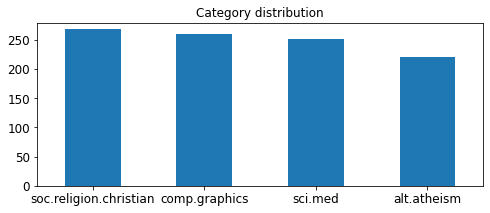

In [7]:
# Exercise 7 (take home): Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)
import matplotlib.pyplot as plt
%matplotlib inline

# Answer here
upper_bound = max(X_sample.category_name.value_counts()) + 10
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

X.category_name.value_counts() : 
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

X_sample.category_name.value_counts() : 
soc.religion.christian    269
comp.graphics             259
sci.med                   252
alt.atheism               220
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

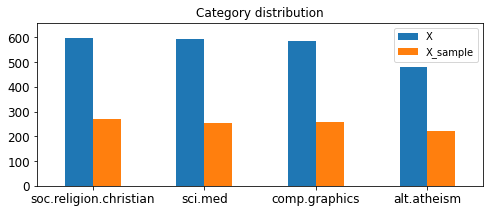

In [8]:
# Exercise 8 (take home): We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

# Answer here
upper_bound = max(max(X_sample.category_name.value_counts()) + 60, max(X.category_name.value_counts()) + 60)

print("X.category_name.value_counts() : ")
print(X.category_name.value_counts())
print()
print("X_sample.category_name.value_counts() : ")
print(X_sample.category_name.value_counts())

df = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
df.columns = ['X', 'X_sample']
df.plot(kind = 'bar',
        title = 'Category distribution',
        ylim = [0, upper_bound], 
        rot = 0, fontsize = 12, figsize = (8,3))

In [9]:
# Exercise 10 (take home): We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# Answer here
fifth_record_count = X_counts[4, 0:100].toarray()
fifth_record_count = (np.array(fifth_record_count)).flatten()
index_of_1 = [i for i, n in enumerate(fifth_record_count) if n == 1]
for index in index_of_1:
    print("Term " + str(index) + " : " + count_vect.get_feature_names_out()[index])

Term 0 : 00
Term 37 : 01


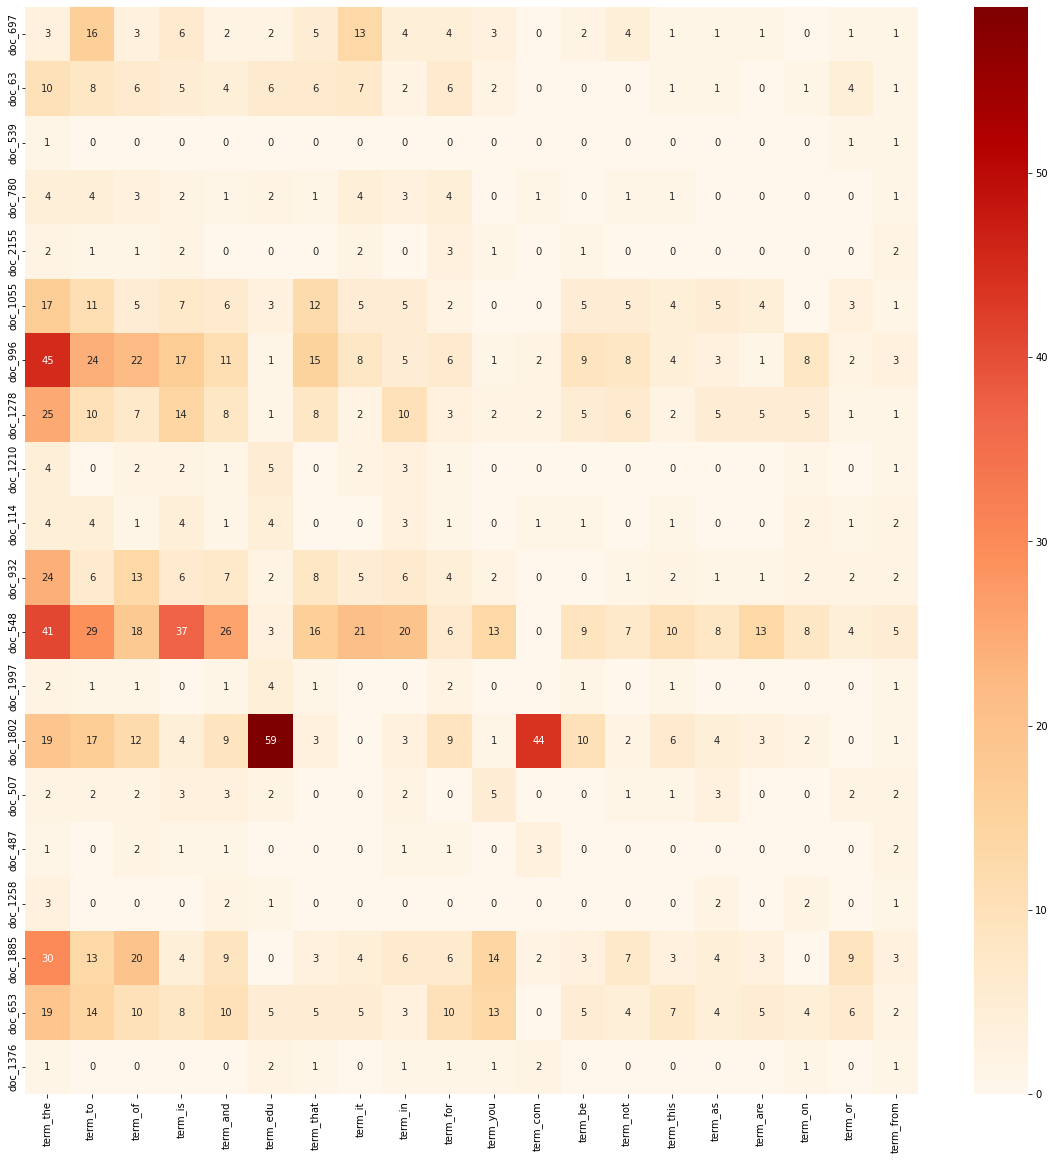

In [10]:
# Exercise 11 (take home): From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an exercise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

# Answer here
"""
(1) To have a useful visualization of term-document matrix, the original dataset is sampled to obtain the 20 most representative documents.

(2) Within those large amount of words in 20 sampled documents, 20 most frequently used words are selected.

(3) It's worth noting that the word which frequently used in one document might be less frequently used in another documents,
    this shows that the difference in document category and the writer of document. 
"""
from sklearn.feature_extraction.text import CountVectorizer

# Sample the dataset
X_sample = X.sample(n=20)
# Extract the terms from sampled dataset
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_sample.text)

# Obtain the terms frequency
X_counts_sample_row = np.array(X_counts.sum(0)).flatten()
# Sort the terms frequency in descending order
X_counts_sample_row_sort = np.sort(X_counts_sample_row)[::-1]

X_counts_sample_row_index = []

for elem in X_counts_sample_row_sort[:20]:
    temp = np.where(X_counts_sample_row == elem)
    if len(temp[0]) > 1:
        for elem in temp[0]:
            if elem not in X_counts_sample_row_index:
                X_counts_sample_row_index.append(elem)
    else:
        X_counts_sample_row_index.append(temp[0][0])

X_counts_sample = X_counts[:,:20][:].toarray()
X_counts_array = X_counts.toarray()
plot_x = []
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)[0:20]]
for i in range(20):
    X_counts_sample[:,i] = X_counts_array[:,X_counts_sample_row_index[i]]
    plot_x.append("term_"+str(count_vect.get_feature_names_out()[X_counts_sample_row_index[i]]))

plot_z = X_counts_sample

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20,20))
ax = sns.heatmap(df_todraw, cmap="OrRd", annot=True)


Variance: [65.9370034  4.330329   3.5975199]


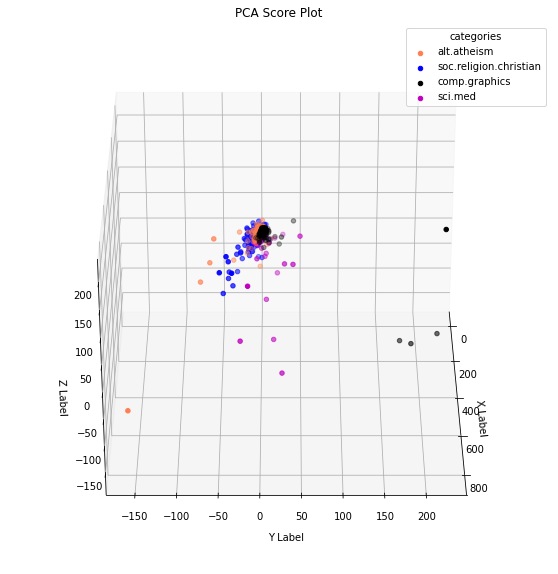

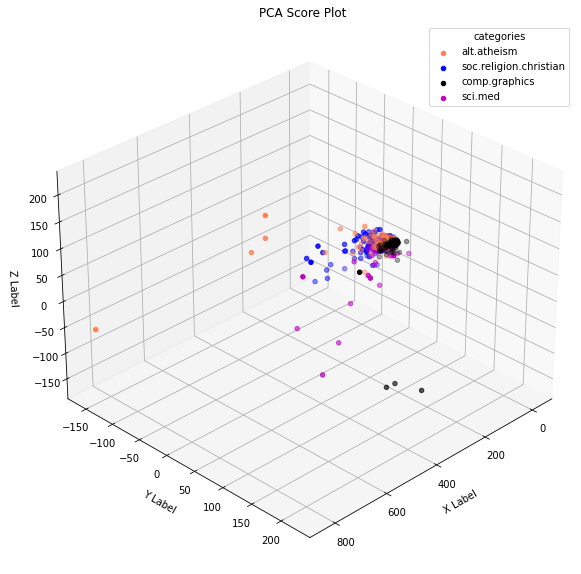

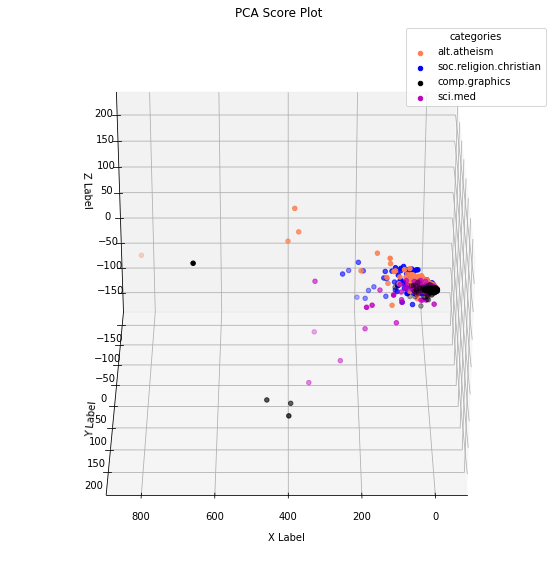

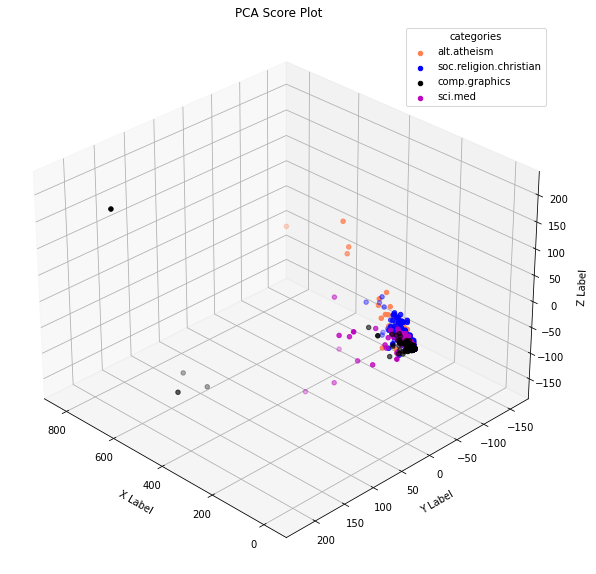

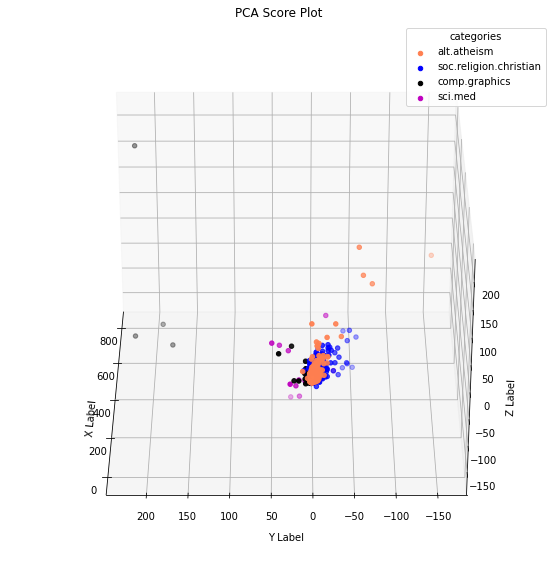

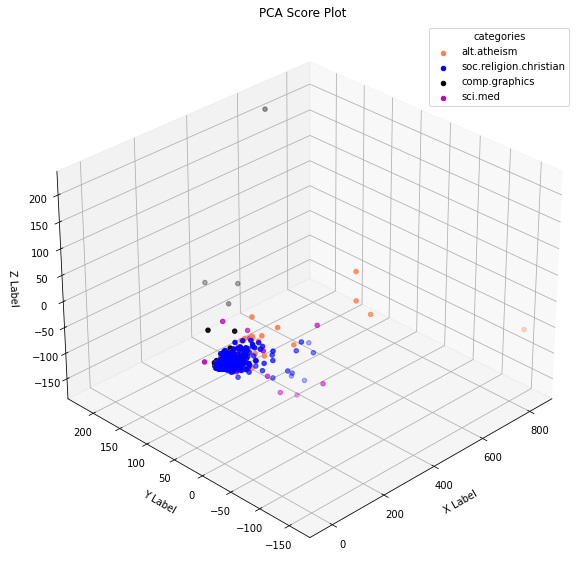

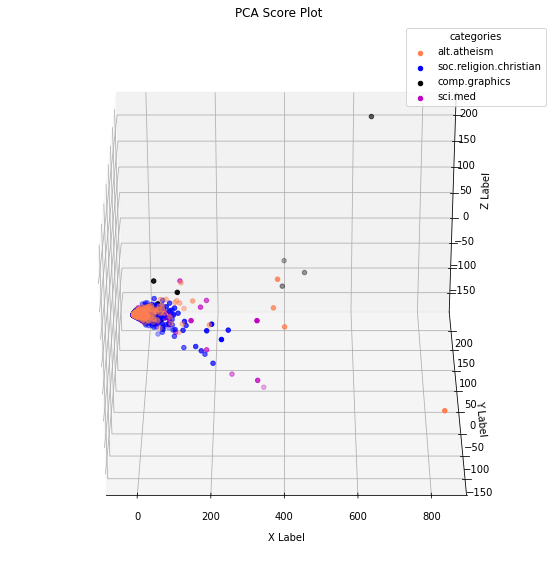

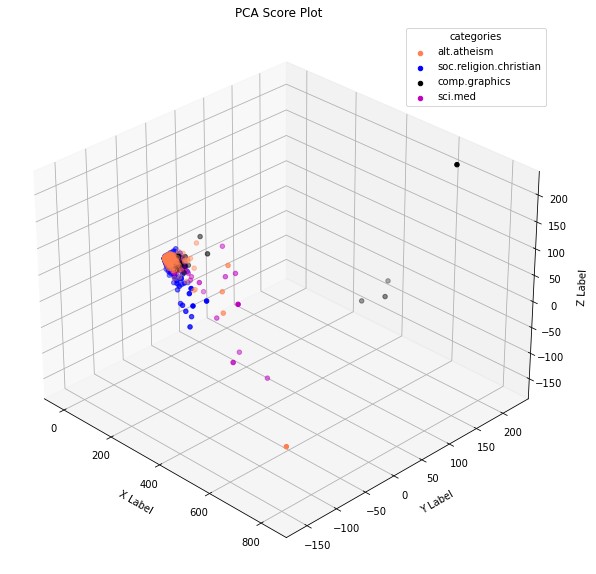

In [11]:
# Exercise 12 (take home): Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

from sklearn.decomposition import PCA

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# Answer here
pca = PCA(n_components = 3)
X_reduced = pca.fit_transform(X_counts.toarray())
print("Variance:", end=" ")
print(pca.explained_variance_ratio_ * 100)

col = ['coral', 'blue', 'black', 'm']

# plot
for angle in range(0,360,45):
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(projection='3d')

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.set_title('PCA Score Plot')
    ax.legend(categories, title="categories")
    ax.view_init(30, angle)

In [12]:
"""
(1) From the result, it can be shown that the dataset is widely distributed along PC1, which PC1 reserved most of the variance (65.9370034%).

(2) Besides, there is a serious overlapping of cluster of each categories, which the data mainly clustered together at about (50,0,-50).

(3) There are outliers for each categories, which the category 'comp.graphics', 'alt.atheism' and 'sci.med' appeared to be more obvious.

(4) In my opinion, the dimension should be increased since PC1,2 and 3 reserved not as many variance as expected. 
"""

"\n(1) From the result, it can be shown that the dataset is widely distributed along PC1, which PC1 reserved most of the variance (65.9370034%).\n\n(2) Besides, there is a serious overlapping of cluster of each categories, which the data mainly clustered together at about (50,0,-50).\n\n(3) There are outliers for each categories, which the category 'comp.graphics', 'alt.atheism' and 'sci.med' appeared to be more obvious.\n\n(4) In my opinion, the dimension should be increased since PC1,2 and 3 reserved not as many variance as expected. \n"

In [13]:
# Exercise 13 (take home): If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Answer here
import plotly.express as px

df = pd.DataFrame(term_frequencies[:300])
tf = pd.DataFrame((df).values,index=count_vect.get_feature_names_out()[:300], columns={"term_frequency"})
fig = px.line(tf, y="term_frequency", x=count_vect.get_feature_names_out()[:300])
fig.show()

In [14]:
# Exercise 14 (take home): The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

# Answer here
threshold = 0.01 * max(term_frequencies)
reduced_term_frequency = [i for i in term_frequencies if i > threshold]
reduced_term_index = [i for i in range(len(term_frequencies)) if term_frequencies[i] > threshold]
reduced_term_name = [count_vect.get_feature_names_out()[i] for i in reduced_term_index]

df_reduced = pd.DataFrame(reduced_term_frequency, index=reduced_term_name, columns={"term_frequency"})
fig = px.line(df_reduced, y="term_frequency", x=reduced_term_name)
fig.show()

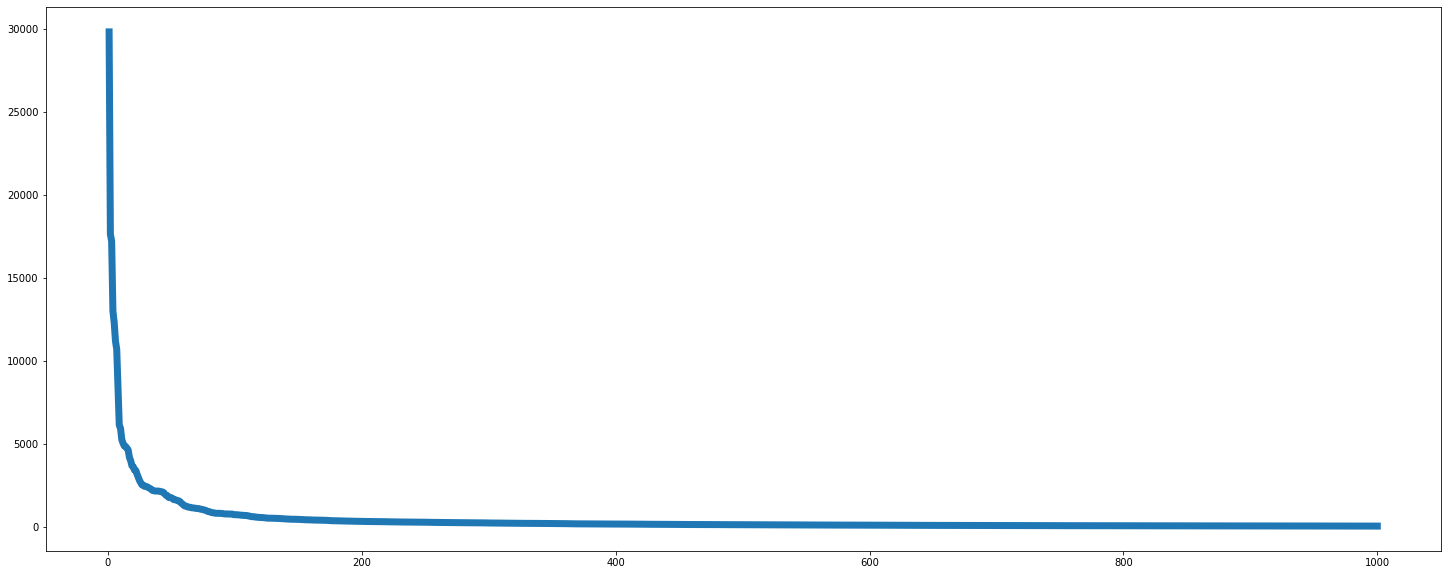

In [15]:
# Exercise 15 (take home): Long tail

# Answer here

# Plot the graph using top 1000 points to have a better visualization of long tail
long_tail_distribution = np.sort(term_frequencies)[::-1]
x = [i+1 for i in range(len(long_tail_distribution[:1000]))]
y = long_tail_distribution[:1000]

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot()
ax.plot(x, y, linewidth=7)

In [16]:
# Exercise 16 (take home): Try to generate the binarization using the `category_name` column instead. Does it work?

from sklearn import preprocessing

# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9] 

# It works!

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


In [17]:
### Second Part: follow the same process from the [DM2021-Lab1-master Repo] on the new dataset ###

In [18]:
# Load data collected from three websites (amazon, imdb, yelp)
f1 = open('sentiment_labelled_sentences/amazon_cells_labelled.txt', 'r', encoding="utf-8")
f2 = open('sentiment_labelled_sentences/imdb_labelled.txt', 'r', encoding="utf-8")
f3 = open('sentiment_labelled_sentences/yelp_labelled.txt', 'r', encoding="utf-8")

# Categories label
categories = {'1' : 'Positive', '0' : 'Negative'}

In [19]:
# Data Preparation (amazon.com)
text_amazon = []
text_amazon_category = []
for line in f1:
    line = " ".join(line.split("\n")).strip()
    # record the label of each sentences
    # check if the label is missing
    if line[-1] not in categories:
        sentence_category = None
    else:
        sentence_category = line[-1] 
    # remove white spaces after label is removed
    sentence = line[:-1].strip()
    text_amazon.append([sentence])
    text_amazon_category.append(sentence_category)
source_amazon = ['amazon.com' for _ in range(len(text_amazon_category))]

# Data Preparation (imdb.com)
text_imdb = []
text_imdb_category = []
for line in f2:
    line = " ".join(line.split("\n")).strip()
    # record the label of each sentences
    # check if the label is missing
    if line[-1] not in categories:
        sentence_category = None
    else:
        sentence_category = line[-1]
    # remove white spaces after label is removed
    sentence = line[:-1].strip()
    text_imdb.append([sentence])
    text_imdb_category.append(sentence_category)
source_imdb = ['imdb.com' for _ in range(len(text_imdb_category))]

# Data Preparation (yelp.com)
text_yelp = []
text_yelp_category = []
for line in f3:
    line = " ".join(line.split("\n")).strip()
    # record the label of each sentences
    # check if the label is missing
    if line[-1] not in categories:
        sentence_category = None
    else:
        sentence_category = line[-1]
    # remove white spaces after label is removed
    sentence = line[:-1].strip()
    text_yelp.append([sentence])
    text_yelp_category.append(sentence_category)
source_yelp = ['yelp.com' for _ in range(len(text_yelp_category))]

f1.close()
f2.close()
f3.close()

In [20]:
# Construct a dataframe for each source
df_amazon = pd.DataFrame.from_records(text_amazon, columns=['text'])
df_amazon['category'] = text_amazon_category
df_amazon[:5]

,text,category
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [21]:
df_imdb = pd.DataFrame.from_records(text_imdb, columns=['text'])
df_imdb['category'] = text_imdb_category
df_imdb[:5]

,text,category
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [22]:
df_yelp = pd.DataFrame.from_records(text_yelp, columns=['text'])
df_yelp['category'] = text_yelp_category
df_yelp[:5]

,text,category
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [23]:
# Combine data from three sources into one dataset and construct a complete dataframe
dataset_raw = text_amazon + text_imdb + text_yelp
dataset_source = source_amazon + source_imdb + source_yelp
dataset_category = text_amazon_category + text_imdb_category + text_yelp_category

dataset_df = pd.DataFrame.from_records(dataset_raw, columns=['text'])
# add source to the dataframe
dataset_df['source'] = dataset_source
# add category to the dataframe
dataset_df['category'] = dataset_category

# function to format the labels
def format_labels(target, docs):
    if target is None:
        return None
    else:
        return docs[target]

# add category label to the dataframe by converting category into category_name
dataset_df['category_name'] = dataset_df.category.apply(lambda t: format_labels(t, categories))

dataset_df[:5]

,text,source,category,category_name
0,So there is no way for me to plug it in here i...,amazon.com,0,Negative
1,"Good case, Excellent value.",amazon.com,1,Positive
2,Great for the jawbone.,amazon.com,1,Positive
3,Tied to charger for conversations lasting more...,amazon.com,0,Negative
4,The mic is great.,amazon.com,1,Positive


In [24]:
# Dataframe Quering (last 10 records)
dataset_df[-10:]

,text,source,category,category_name
2990,The refried beans that came with my meal were ...,yelp.com,0,Negative
2991,Spend your money and time some place else.,yelp.com,0,Negative
2992,A lady at the table next to us found a live gr...,yelp.com,0,Negative
2993,the presentation of the food was awful.,yelp.com,0,Negative
2994,I can't tell you how disappointed I was.,yelp.com,0,Negative
2995,I think food should have flavor and texture an...,yelp.com,0,Negative
2996,Appetite instantly gone.,yelp.com,0,Negative
2997,Overall I was not impressed and would not go b...,yelp.com,0,Negative
2998,"The whole experience was underwhelming, and I ...",yelp.com,0,Negative
2999,"Then, as if I hadn't wasted enough of my life ...",yelp.com,0,Negative


In [25]:
# Dataframe Quering (using iloc (by position))
dataset_df.iloc[::200, 0:2][0:10]

,text,source
0,So there is no way for me to plug it in here i...,amazon.com
200,The color is even prettier than I thought it w...,amazon.com
400,what a disappointment,amazon.com
600,Their Research and Development division obviou...,amazon.com
800,"Good , works fine.",amazon.com
1000,"A very, very, very slow-moving, aimless movie ...",imdb.com
1200,This is definitely one of the bad ones.,imdb.com
1400,A good commentary of today's love and undoubte...,imdb.com
1600,Perabo has a nice energy level and is obviousl...,imdb.com
1800,"In fact, this stinker smells like a direct-to-...",imdb.com


In [26]:
# Dataframe Quering (using loc (by label))
dataset_df.loc[::200, 'text'][0:10]

0       So there is no way for me to plug it in here i...
200     The color is even prettier than I thought it w...
400                                 what a disappointment
600     Their Research and Development division obviou...
800                                    Good , works fine.
1000    A very, very, very slow-moving, aimless movie ...
1200              This is definitely one of the bad ones.
1400    A good commentary of today's love and undoubte...
1600    Perabo has a nice energy level and is obviousl...
1800    In fact, this stinker smells like a direct-to-...
Name: text, dtype: object

In [27]:
# Dataframe Quering (standard query)
dataset_df[::200][0:10]

,text,source,category,category_name
0,So there is no way for me to plug it in here i...,amazon.com,0,Negative
200,The color is even prettier than I thought it w...,amazon.com,1,Positive
400,what a disappointment,amazon.com,0,Negative
600,Their Research and Development division obviou...,amazon.com,1,Positive
800,"Good , works fine.",amazon.com,1,Positive
1000,"A very, very, very slow-moving, aimless movie ...",imdb.com,0,Negative
1200,This is definitely one of the bad ones.,imdb.com,0,Negative
1400,A good commentary of today's love and undoubte...,imdb.com,1,Positive
1600,Perabo has a nice energy level and is obviousl...,imdb.com,1,Positive
1800,"In fact, this stinker smells like a direct-to-...",imdb.com,0,Negative


In [28]:
# Dataframe Quering (using query)
# Can determine the total counts of sentences belong to positive or negative sentiment
dataset_df.query("category_name == 'Positive'")

,text,source,category,category_name
1,"Good case, Excellent value.",amazon.com,1,Positive
2,Great for the jawbone.,amazon.com,1,Positive
4,The mic is great.,amazon.com,1,Positive
7,If you are Razr owner...you must have this!,amazon.com,1,Positive
10,And the sound quality is great.,amazon.com,1,Positive
...,...,...,...,...
2899,"Overall, a great experience.",yelp.com,1,Positive
2901,Their regular toasted bread was equally satisf...,yelp.com,1,Positive
2907,The chips and sals a here is amazing!!!!!!!!!!...,yelp.com,1,Positive
2909,This is my new fav Vegas buffet spot.,yelp.com,1,Positive


In [29]:
# Check missing data
from helpers import data_mining_helpers as dmh

dataset_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,source,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [30]:
# Check duplicate data
sum(dataset_df.duplicated())

17

In [31]:
# Remove those duplicate data and keep a copy
dataset_df.drop_duplicates(keep='first', inplace=True)
sum(dataset_df.duplicated())

0

In [32]:
# Data Preprocessing
# Sampling
dataset_df_sample = dataset_df.sample(n=1000)
dataset_df_sample[:4]

,text,source,category,category_name
1898,"The best part about ""Nurse Betty"" is it's unpr...",imdb.com,1,Positive
690,The nokia CA-42 USB cable did not work with my...,amazon.com,0,Negative
2141,The waiter wasn't helpful or friendly and rare...,yelp.com,0,Negative
1809,Cinematography: The film was shot in an intere...,imdb.com,1,Positive


Dataset_df.category_name.value_counts() : 
Negative    1493
Positive    1490
Name: category_name, dtype: int64

Dataset_df_sample.category_name.value_counts() : 
Positive    520
Negative    480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

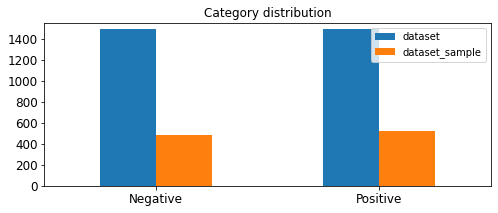

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

# Comparison of data distribution according to category_name
upper_bound = max(max(dataset_df_sample.category_name.value_counts()) + 60, max(dataset_df.category_name.value_counts()) + 60)

print("Dataset_df.category_name.value_counts() : ")
print(dataset_df.category_name.value_counts())
print()
print("Dataset_df_sample.category_name.value_counts() : ")
print(dataset_df_sample.category_name.value_counts())

df = pd.concat([dataset_df.category_name.value_counts(), dataset_df_sample.category_name.value_counts()], axis=1)
df.columns = ['dataset', 'dataset_sample']
df.plot(kind = 'bar',
        title = 'Category distribution',
        ylim = [0, upper_bound], 
        rot = 0, fontsize = 12, figsize = (8,3))

Dataset_df.source.value_counts() : 
imdb.com      997
yelp.com      996
amazon.com    990
Name: source, dtype: int64

Dataset_df_sample.source.value_counts() : 
imdb.com      354
yelp.com      334
amazon.com    312
Name: source, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

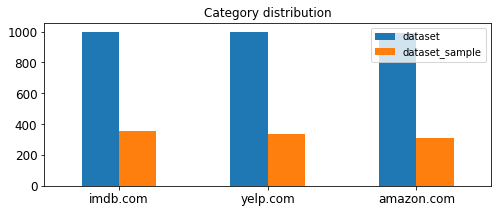

In [34]:
# Comparison of data distribution according to source
upper_bound = max(max(dataset_df_sample.source.value_counts()) + 60, max(dataset_df.source.value_counts()) + 60)

print("Dataset_df.source.value_counts() : ")
print(dataset_df.source.value_counts())
print()
print("Dataset_df_sample.source.value_counts() : ")
print(dataset_df_sample.source.value_counts())

df = pd.concat([dataset_df.source.value_counts(), dataset_df_sample.source.value_counts()], axis=1)
df.columns = ['dataset', 'dataset_sample']
df.plot(kind = 'bar',
        title = 'Category distribution',
        ylim = [0, upper_bound], 
        rot = 0, fontsize = 12, figsize = (8,3))

In [35]:
# Feature Creation
import nltk
nltk.download('punkt')

# takes a like a minute or two to process
dataset_df['unigrams'] = dataset_df['text'].apply(lambda x: dmh.tokenize_text(x))
dataset_df[:4]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JiaHe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,source,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,amazon.com,0,Negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",amazon.com,1,Positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,amazon.com,1,Positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,amazon.com,0,Negative,"[Tied, to, charger, for, conversations, lastin..."


In [36]:
list(dataset_df[:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [37]:
# Feature Subset Selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
dataset_counts = count_vect.fit_transform(dataset_df.text)
analyze = count_vect.build_analyzer()

# Test the new analyzer
" ".join(list(dataset_df[:1].text))

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [38]:
analyze(" ".join(list(dataset_df[:1].text))) # Note that punctuation is gone

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [39]:
# Check the shape, total number of terms can be known
dataset_counts.shape

(2983, 5155)

In [40]:
count_vect.get_feature_names_out()[:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [41]:
# we convert from sparse array to normal array
dataset_counts[:5, :100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [42]:
# Check the 1 at fourth record
forth_record_count = dataset_counts[3, 0:100].toarray()
forth_record_count = (np.array(forth_record_count)).flatten()
index_of_1 = [i for i, n in enumerate(forth_record_count) if n == 1]
for index in index_of_1:
    print("Term " + str(index) + " : " + count_vect.get_feature_names_out()[index])

Term 45 : 45


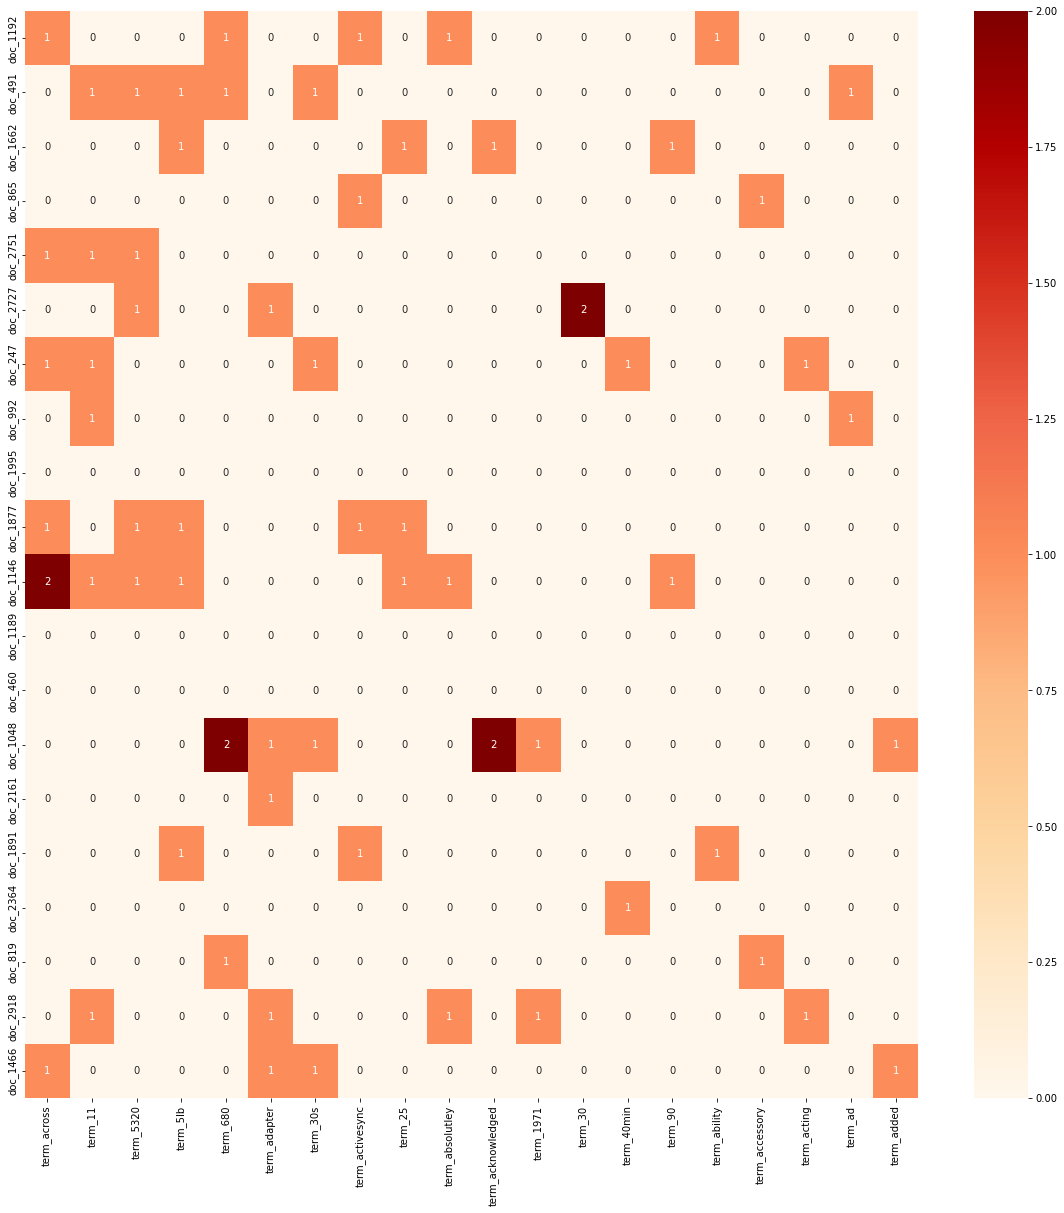

In [43]:
# Plot the heatmap for better visualization of dataset

# Construct a new Document-Term Matrix for the sample dataset
count_vect_sample = CountVectorizer()
X_sample = dataset_df.sample(n=20)
X_counts = count_vect_sample.fit_transform(X_sample.text)

# Get the sum of used frequency of each terms (sum of each row along each column)
X_counts_sample_row = np.array(X_counts.sum(0)).flatten()
# Sort the total number of used frequency of each terms in descending order
X_counts_sample_row_sort = np.sort(X_counts_sample_row)[::-1]
# List to store/ remember the index of those sorting frequencies which belongs to the terms in original dataset
X_counts_sample_row_index = []
# Obtain the index in original dataset
for elem in X_counts_sample_row_sort[:20]:
    temp = np.where(X_counts_sample_row == elem)
    if len(temp[0]) > 1:
        for elem in temp[0]:
            if elem not in X_counts_sample_row_index:
                X_counts_sample_row_index.append(elem)
    else:
        X_counts_sample_row_index.append(temp[0][0])
# Ontain the top 20 highest frequencies used terms
X_counts_sample = X_counts[:,:20][:].toarray()
X_counts_array = X_counts.toarray()
plot_x = []
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)[0:20]]
for i in range(20):
    X_counts_sample[:,i] = X_counts_array[:,X_counts_sample_row_index[i]]
    plot_x.append("term_"+str(count_vect.get_feature_names_out()[X_counts_sample_row_index[i]]))

plot_z = X_counts_sample

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20,20))
ax = sns.heatmap(df_todraw, cmap="OrRd", annot=True)

[[ 0.52403901  0.28721704 -1.33350901]
 [-0.89836918 -0.36059814  0.22775655]
 [ 0.01536217 -0.66716517  0.09308566]
 ...
 [-0.50167697  0.41336547  0.69531472]
 [ 0.49819503  0.36754768  0.35582756]
 [ 2.3319155  -0.47563679 -1.15114492]]
Variance: [8.01881683 3.38568595 2.61843681]


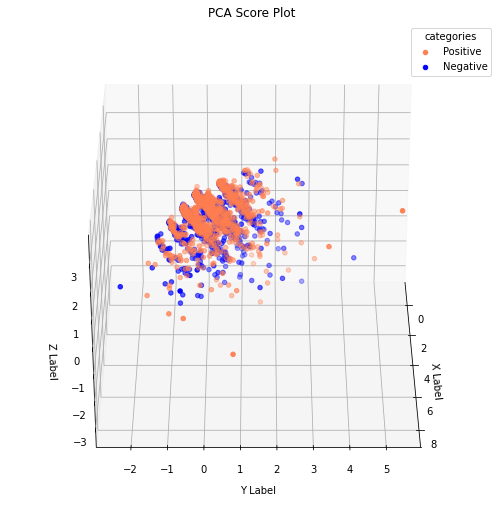

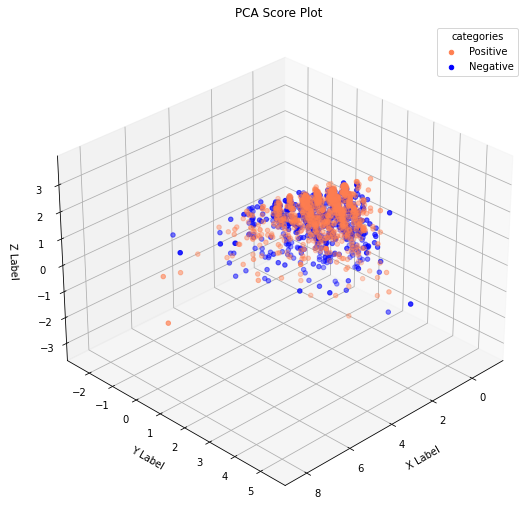

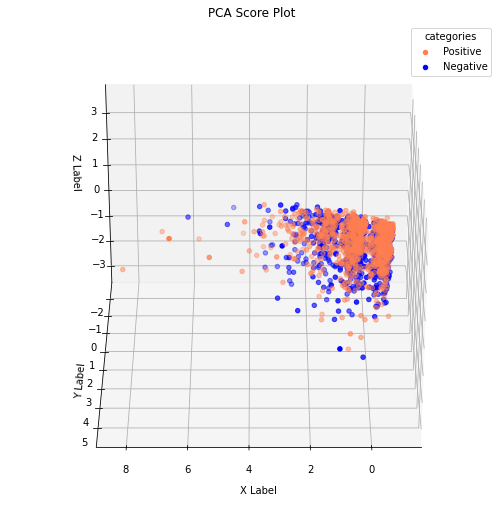

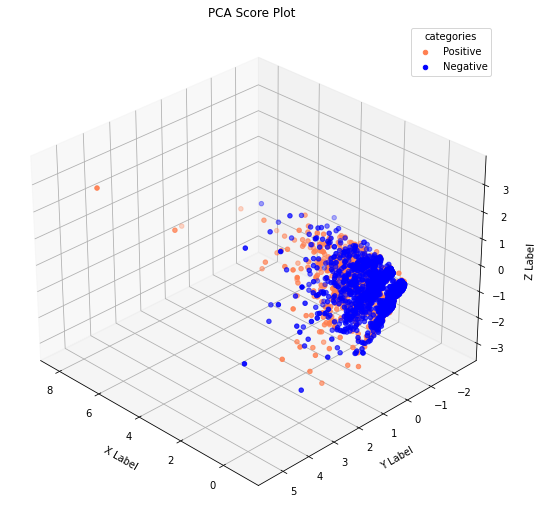

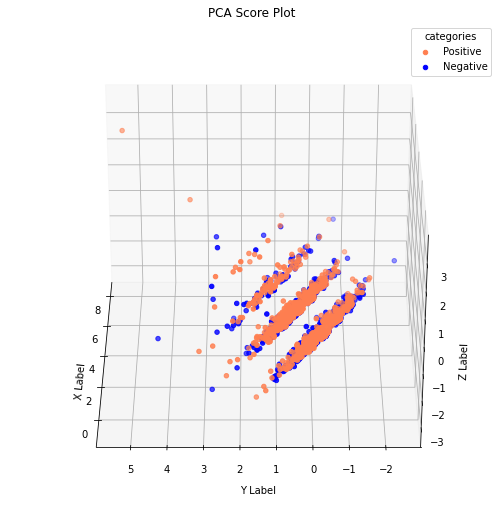

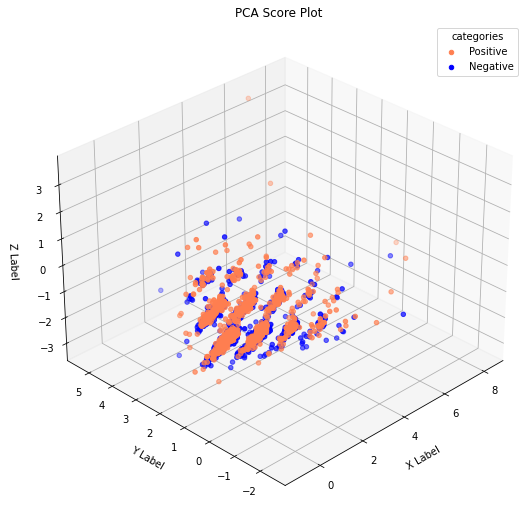

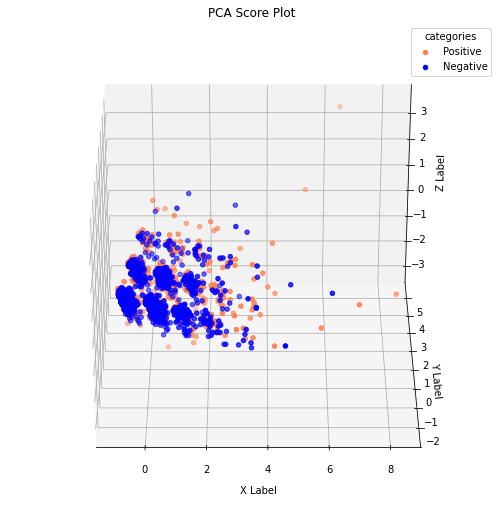

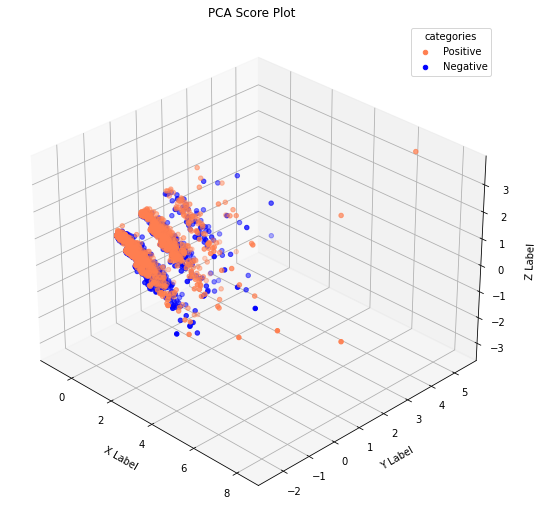

In [44]:
# Visualization of data after dimensionality reduction using PCA
# We can observe that is it easy to discriminate the sentiment/ is there an obvious boundary between positive and negative sentiment
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
dataset_counts_reduced = pca.fit_transform(dataset_counts.toarray())
print(dataset_counts_reduced)
print("Variance:", end=" ")
print(pca.explained_variance_ratio_ * 100)

col = ['coral', 'blue']

# plot in 8 different angles, from 0 to 360 degree
for angle in range(0,360,45):
    fig = plt.figure(figsize = (12,9))
    ax = fig.add_subplot(projection='3d')

    for c, category in zip(col, categories.values()):
        xs = dataset_counts_reduced[dataset_df['category_name'] == category].T[0]
        ys = dataset_counts_reduced[dataset_df['category_name'] == category].T[1]
        zs = dataset_counts_reduced[dataset_df['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.set_title('PCA Score Plot')
    ax.legend(categories.values(), title="categories")
    ax.view_init(30, angle)


In [45]:
"""
(1) From the PCA score plot shown above, it's obvious that there is severe overlapping of data points belong to positive and negative sentiment.

(2) It's as expected because we can never identify the sentiment of a sentence by just referring to 2-3 words.
"""

"\n(1) From the PCA score plot shown above, it's obvious that there is severe overlapping of data points belong to positive and negative sentiment.\n\n(2) It's as expected because we can never identify the sentiment of a sentence by just referring to 2-3 words.\n"

In [46]:
# Attribute Transformation/ Aggregation (Frequency of word/ term being used)
import numpy as np
term_frequencies = np.asarray(dataset_counts.sum(axis=0))[0]
term_frequencies[:300]

array([   1,   36,    3,    2,    4,    3,    3,    1,    1,    2,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    9,    1,    2,    1,    1,    2,    1,    1,    1,    2,
          1,    7,    1,    1,    3,    1,    1,    1,    5,    1,    1,
          1,    2,    1,    1,    4,    1,    3,    1,    1,    1,    1,
          2,    1,    1,    1,    2,    1,    1,    1,    1,    1,    1,
          7,    1,    1,    1,    1,    1,    5,    4,    1,   85,    7,
          1,    1,    1,   21,    1,    1,    2,    1,    1,    1,    2,
          1,    2,    1,    1,    1,    1,    1,    1,    2,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    2,    1,    2,
          1,    1,    2,    1,    2,    3,   43,    7,    1,    1,    1,
          1,   10,   19,    3,    3,    1,   16,    1,    1,    2,    1,
          1,    2,    3,    4,    2,    1,    1,    1,    1,    1,    6,
          1,    1,    2,    4,    3,    1,    1,   

In [47]:
# Visualize the frequency of first 300 terms
import plotly.express as px

df = pd.DataFrame(term_frequencies[:300])
tf = pd.DataFrame((df).values,index=count_vect.get_feature_names_out()[:300], columns={"term_frequency"})
fig = px.line(tf, y="term_frequency", x=count_vect.get_feature_names_out()[:300])
fig.show()

In [48]:
# Visualization after reduced the terms which has very low frequency
# Construct threshold for data visualization
threshold = 0.01 * max(term_frequencies)
reduced_term_frequency = [i for i in term_frequencies if i > threshold]
reduced_term_index = [i for i in range(len(term_frequencies)) if term_frequencies[i] > threshold]
reduced_term_name = [count_vect.get_feature_names_out()[i] for i in reduced_term_index]

df_reduced = pd.DataFrame(reduced_term_frequency, index=reduced_term_name, columns={"term_frequency"})
fig = px.line(df_reduced, y="term_frequency", x=reduced_term_name)
fig.show()

In [49]:
# Visualize the frequently used words in positive sentiment sentences
dataset_positive = dataset_df.query("category_name == 'Positive'")

count_vect_positive = CountVectorizer()
dataset_positive_counts = count_vect_positive.fit_transform(dataset_positive.text)

term_frequencies = np.asarray(dataset_positive_counts.sum(axis=0))[0]

threshold = 0.01 * max(term_frequencies)
reduced_term_frequency = [i for i in term_frequencies if i > threshold]
reduced_term_index = [i for i in range(len(term_frequencies)) if term_frequencies[i] > threshold]
reduced_term_name = [count_vect_positive.get_feature_names_out()[i] for i in reduced_term_index]

df_reduced = pd.DataFrame(reduced_term_frequency, index=reduced_term_name, columns={"term_frequency"})
fig = px.line(df_reduced, y="term_frequency", x=reduced_term_name)
fig.show()

In [50]:
# Visualize the frequently used words in negative sentiment sentences
dataset_negative = dataset_df.query("category_name == 'Negative'")

count_vect_negative = CountVectorizer()
dataset_negative_counts = count_vect_negative.fit_transform(dataset_negative.text)

term_frequencies = np.asarray(dataset_negative_counts.sum(axis=0))[0]

threshold = 0.01 * max(term_frequencies)
reduced_term_frequency = [i for i in term_frequencies if i > threshold]
reduced_term_index = [i for i in range(len(term_frequencies)) if term_frequencies[i] > threshold]
reduced_term_name = [count_vect_negative.get_feature_names_out()[i] for i in reduced_term_index]

df_reduced = pd.DataFrame(reduced_term_frequency, index=reduced_term_name, columns={"term_frequency"})
fig = px.line(df_reduced, y="term_frequency", x=reduced_term_name)
fig.show()

In [51]:
"""
(1) From the above observation, the point which is worth noting is not the most used word in positive and negative sentiment data.
    Instead, it's the word which has "low" frequency still remaining in the plot after thresholding is applied.

(2) It's normal that the most used words in both categories are those words which are less meaningful in sentiment classification,
    such as 'the' 'and'. Notes that all these words are the one which among the highest used word in both categories, which explain
    the overlapping of data points we observed in PCA score plot.

(3) After thresholding, those word which has no contribution in sentiment classification will be removed, which means all the remaining words
    play an important part in the classification, except those most frequent used words. 

(4) Again, it's shown that we cannot classify the sentiment of a sentence by just referring to few words, which bring out the difficulty of sentiment classification. 
"""

'\n(1) From the above observation, the point which is worth noting is not the most used word in positive and negative sentiment data.\n    Instead, it\'s the word which has "low" frequency still remaining in the plot after thresholding is applied.\n\n(2) It\'s normal that the most used words in both categories are those words which are less meaningful in sentiment classification,\n    such as \'the\' \'and\'. Notes that all these words are the one which among the highest used word in both categories, which explain\n    the overlapping of data points we observed in PCA score plot.\n\n(3) After thresholding, those word which has no contribution in sentiment classification will be removed, which means all the remaining words\n    play an important part in the classification, except those most frequent used words. \n\n(4) Again, it\'s shown that we cannot classify the sentiment of a sentence by just referring to few words, which bring out the difficulty of sentiment classification. \n'

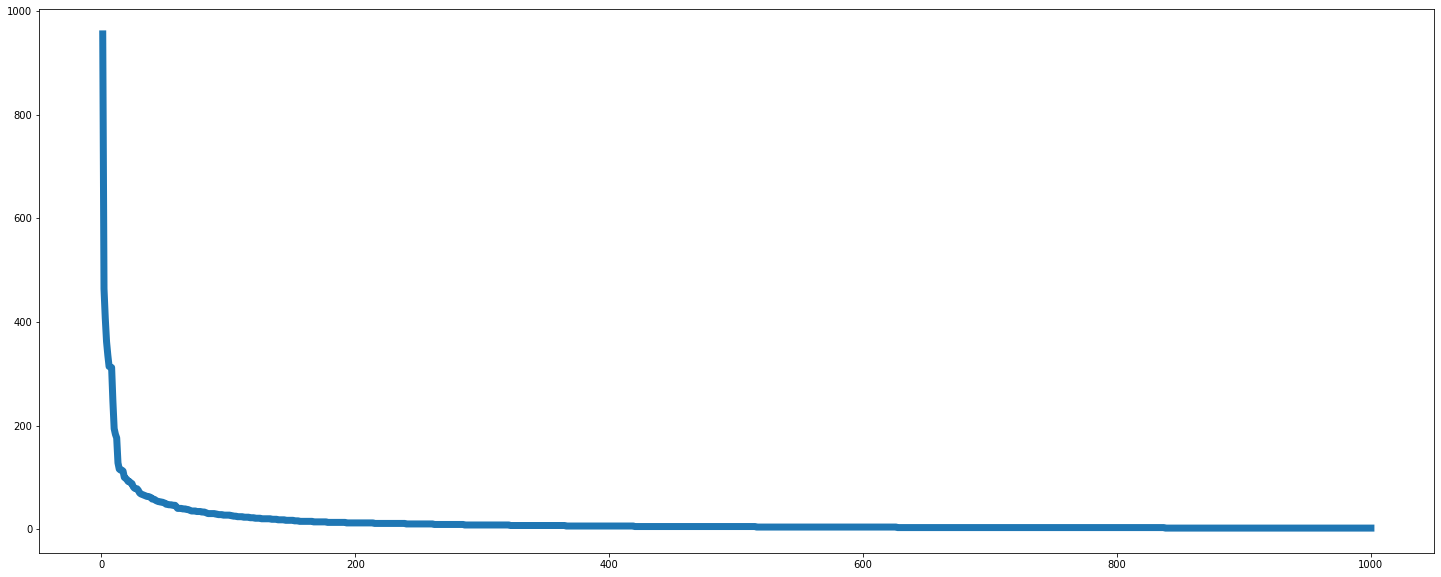

In [52]:
# Long-tail distribution
# Plot the graph using top 1000 points to have a better visualization of long tail
long_tail_distribution = np.sort(term_frequencies)[::-1]
x = [i+1 for i in range(len(long_tail_distribution[:1000]))]
y = long_tail_distribution[:1000]

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot()
ax.plot(x, y, linewidth=7)

In [53]:
# Log distribution of terms frequency
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

df = pd.DataFrame(term_frequencies_log[:300])
tf = pd.DataFrame((df).values,index=count_vect.get_feature_names_out()[:300], columns={"log-term_frequency"})
fig = px.line(tf, y="log-term_frequency", x=count_vect.get_feature_names_out()[:300])
fig.show()

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


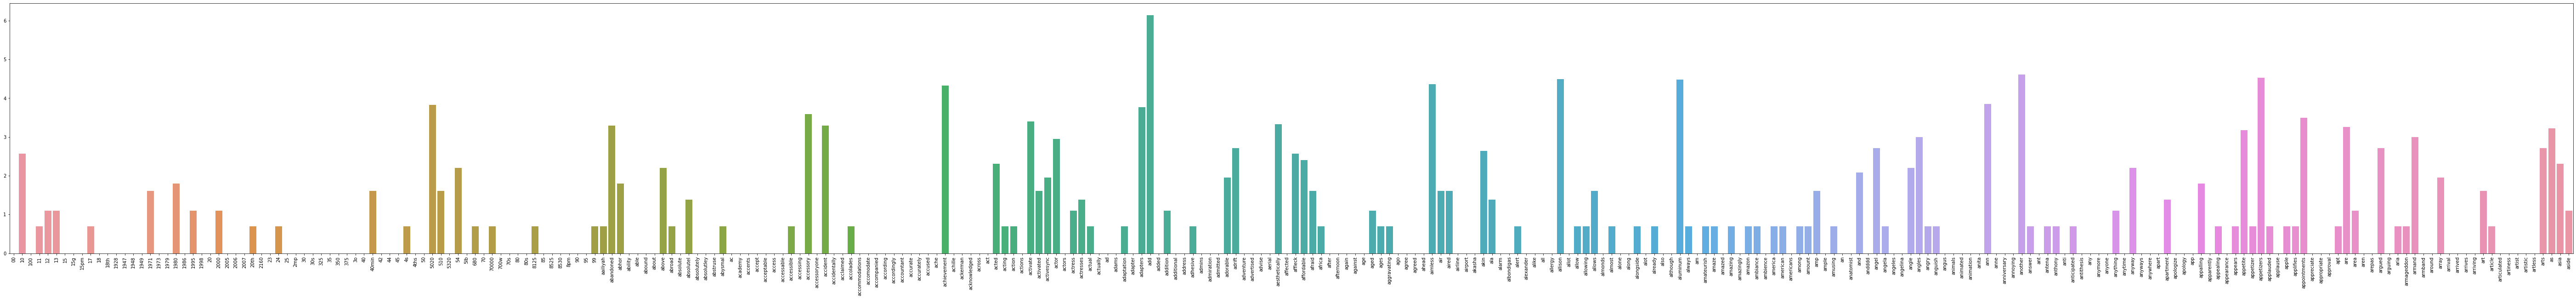

In [54]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [55]:
# Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# Since the category is originally in binary form, binarization of source is carried out
mlb = preprocessing.LabelBinarizer()
mlb.fit(dataset_df.source)
dataset_df['bin_category'] = mlb.transform(dataset_df['source']).tolist()
dataset_df.query("category_name == 'Positive'")

,text,source,category,category_name,unigrams,bin_category
1,"Good case, Excellent value.",amazon.com,1,Positive,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,amazon.com,1,Positive,"[Great, for, the, jawbone, .]","[1, 0, 0]"
4,The mic is great.,amazon.com,1,Positive,"[The, mic, is, great, .]","[1, 0, 0]"
7,If you are Razr owner...you must have this!,amazon.com,1,Positive,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
10,And the sound quality is great.,amazon.com,1,Positive,"[And, the, sound, quality, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...,...
2899,"Overall, a great experience.",yelp.com,1,Positive,"[Overall, ,, a, great, experience, .]","[0, 0, 1]"
2901,Their regular toasted bread was equally satisf...,yelp.com,1,Positive,"[Their, regular, toasted, bread, was, equally,...","[0, 0, 1]"
2907,The chips and sals a here is amazing!!!!!!!!!!...,yelp.com,1,Positive,"[The, chips, and, sals, a, here, is, amazing, ...","[0, 0, 1]"
2909,This is my new fav Vegas buffet spot.,yelp.com,1,Positive,"[This, is, my, new, fav, Vegas, buffet, spot, .]","[0, 0, 1]"


In [56]:
# Data Exploration
# In this part, the cosine similarity between data belongs to positive and negative sentiment is determined
# Besides, the cosine similarity between the data from different sources with same sentiment is determined

dataset_df.query("category_name == 'Positive'")
# Retrieve 6 sentences (Positive: amazon, imdb, yelp ; Negative: amazon, imdb, yelp)
# Positive
to_transform_amazon_pos = []
amazon_pos = dataset_positive.query("source == 'amazon.com'").iloc[0,:]
amazon_pos = amazon_pos['text']
to_transform_amazon_pos.append(amazon_pos)

to_transform_imdb_pos = []
imdb_pos = dataset_positive.query("source == 'imdb.com'").iloc[0,:]
imdb_pos = imdb_pos['text']
to_transform_imdb_pos.append(imdb_pos)

to_transform_yelp_pos = []
yelp_pos = dataset_positive.query("source == 'yelp.com'").iloc[0,:]
yelp_pos = yelp_pos['text']
to_transform_yelp_pos.append(yelp_pos)

# Negative
to_transform_amazon_neg = []
amazon_neg = dataset_negative.query("source == 'amazon.com'").iloc[0,:]
amazon_neg = amazon_neg['text']
to_transform_amazon_neg.append(amazon_neg)

to_transform_imdb_neg = []
imdb_neg = dataset_negative.query("source == 'imdb.com'").iloc[0,:]
imdb_neg = imdb_neg['text']
to_transform_imdb_neg.append(imdb_neg)

to_transform_yelp_neg = []
yelp_neg = dataset_negative.query("source == 'yelp.com'").iloc[0,:]
yelp_neg = yelp_neg['text']
to_transform_yelp_neg.append(yelp_neg)

In [57]:
to_transform_yelp_pos

['Wow... Loved this place.']

In [58]:
to_transform_imdb_pos

['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.']

In [59]:
to_transform_amazon_pos

['Good case, Excellent value.']

In [60]:
to_transform_yelp_neg

['Crust is not good.']

In [61]:
to_transform_imdb_neg

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.']

In [62]:
to_transform_amazon_neg

['So there is no way for me to plug it in here in the US unless I go by a converter.']

In [63]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
amazon_pos_vector_count = count_vect.transform(to_transform_amazon_pos)
imdb_pos_vector_count = count_vect.transform(to_transform_imdb_pos)
yelp_pos_vector_count = count_vect.transform(to_transform_yelp_pos)

amazon_neg_vector_count = count_vect.transform(to_transform_amazon_neg)
imdb_neg_vector_count = count_vect.transform(to_transform_imdb_neg)
yelp_neg_vector_count = count_vect.transform(to_transform_yelp_neg)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
amazon_pos_vector_count_bin = binarize(amazon_pos_vector_count)
imdb_pos_vector_count_bin = binarize(imdb_pos_vector_count)
yelp_pos_vector_count_bin = binarize(yelp_pos_vector_count)

amazon_neg_vector_count_bin = binarize(amazon_neg_vector_count)
imdb_neg_vector_count_bin = binarize(imdb_neg_vector_count)
yelp_neg_vector_count_bin = binarize(yelp_neg_vector_count)

In [64]:
print(amazon_pos_vector_count)

  (0, 713)	1
  (0, 1603)	1
  (0, 1993)	1
  (0, 4861)	1


In [65]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
# Positive vs Negative
cos_sim_count_1_4 = cosine_similarity(amazon_pos_vector_count, amazon_neg_vector_count, dense_output=True)
# Amazon vs imdb vs yelp (positive)
cos_sim_count_1_2 = cosine_similarity(amazon_pos_vector_count, imdb_pos_vector_count, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(amazon_pos_vector_count, yelp_pos_vector_count, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(imdb_pos_vector_count, yelp_pos_vector_count, dense_output=True)
# Amazon vs imdb vs yelp (negative)
cos_sim_count_4_5 = cosine_similarity(amazon_neg_vector_count, imdb_neg_vector_count, dense_output=True)
cos_sim_count_4_6 = cosine_similarity(amazon_neg_vector_count, yelp_neg_vector_count, dense_output=True)
cos_sim_count_5_6 = cosine_similarity(imdb_neg_vector_count, yelp_neg_vector_count, dense_output=True)

# Print 
print("Cosine Similarity (Amazon Positive vs Amazon Negative): %(x)f" %{"x":cos_sim_count_1_4})
print("Cosine Similarity (Amazon Positive vs imdb Positive): %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity (Amazon Positive vs yelp Positive): %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity (imdb Positive vs yelp Positive): %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity (Amazon Negative vs imdb Negative): %(x)f" %{"x":cos_sim_count_4_5})
print("Cosine Similarity (Amazon Negative vs yelp Negative): %(x)f" %{"x":cos_sim_count_4_6})
print("Cosine Similarity (imdb Negative vs yelp Negative): %(x)f" %{"x":cos_sim_count_5_6})

Cosine Similarity (Amazon Positive vs Amazon Negative): 0.000000
Cosine Similarity (Amazon Positive vs imdb Positive): 0.000000
Cosine Similarity (Amazon Positive vs yelp Positive): 0.000000
Cosine Similarity (imdb Positive vs yelp Positive): 0.000000
Cosine Similarity (Amazon Negative vs imdb Negative): 0.000000
Cosine Similarity (Amazon Negative vs yelp Negative): 0.109109
Cosine Similarity (imdb Negative vs yelp Negative): 0.000000


In [66]:
"""
(1) The results show that it's very very difficult to classify the sentiment.

(2) Even sentences with the same sentiment will have zero similarity in terms of word being used.

(3) It's impossible to use simple machine learning technique to complete the classification of sentiment of sentences. 

(4) Even it would be a very big challenge by using deep learning technique.

(5) This reflect the major challenges that any NLP Data Scientist faces: to choose the best possible numerical/vectorial representation of the text strings for running Machine Learning models. 
"""

"\n(1) The results show that it's very very difficult to classify the sentiment.\n\n(2) Even sentences with the same sentiment will have zero similarity in terms of word being used.\n\n(3) It's impossible to use simple machine learning technique to complete the classification of sentiment of sentences. \n\n(4) Even it would be a very big challenge by using deep learning technique.\n\n(5) This reflect the major challenges that any NLP Data Scientist faces: to choose the best possible numerical/vectorial representation of the text strings for running Machine Learning models. \n"

In [67]:
### Third Part : Generate Meaningful New Data Visualization ###
"""
(1) Previously, I have visualized the data by using scatter plot (after dimensional reduction), line plot (plotly), heatmap and bar chart(sns).

(2) It was shown that there will be no meaningful information given about the sentiment after dimensional reduction since we cannot identify the sentiment by just referring to a few words. 

(3) By constructing the line plot using Plotly, it was shown that the most frequently used words for both positive and negative sentiment sentences are mutually common to each other.
    It's true since those are common words such as the, and, of, which will appear in almost every English sentences. Thus, there will be little information given by constructing the line plot of top most frequently used words.

(4) The situation is again occurred in the part of constructing heatmap and bar chart which the sparse of data will bring out a bad visualization or unmeaningful information in sentiment classification.

(5) In this case, it's not just about the type of visualization (line plot, bar chart, ......), but also data which we pick to visualize since there will be
    no meaningful information provided even we implement a fancy type of visualization technique on a bunch of meaningless data.

(6) Don't get me wrong, the type of visualization technique is important too to have a good visualization of useful data.

(7) In my opinion, pie chart is easy to be observed and suitable to visualize the words which can make us easier to identify the sentence sentiment.

(8) In previous work, I only build a threshold to eliminate those among the lowest frequency used words. In this part, a maximum threshold should be applied too
    to eliminate those most common words which bring no information in classifying sentiment.

(9) Besides, those words which appear in sentence belongs to both positive and negative sentiment will be eliminated too.

(10) In short, the logic is that words that are too abundant in a corpus and words that are too rare are both not statistically important for finding a pattern.
"""

"\n(1) Previously, I have visualized the data by using scatter plot (after dimensional reduction), line plot (plotly), heatmap and bar chart(sns).\n\n(2) It was shown that there will be no meaningful information given about the sentiment after dimensional reduction since we cannot identify the sentiment by just referring to a few words. \n\n(3) By constructing the line plot using Plotly, it was shown that the most frequently used words for both positive and negative sentiment sentences are mutually common to each other.\n    It's true since those are common words such as the, and, of, which will appear in almost every English sentences. Thus, there will be little information given by constructing the line plot of top most frequently used words.\n\n(4) The situation is again occurred in the part of constructing heatmap and bar chart which the sparse of data will bring out a bad visualization or unmeaningful information in sentiment classification.\n\n(5) In this case, it's not just abou

In [68]:
# Meaningful Data Pre-processing

# Obtain the data labelled as positive sentiment and the corresponding document-term matrix
dataset_positive = dataset_df.query("category_name == 'Positive'")
count_vect_positive = CountVectorizer()
dataset_positive_counts = count_vect_positive.fit_transform(dataset_positive.text)
# Terms-Frequencies of Positive sentiment
term_frequencies_positive = np.asarray(dataset_positive_counts.sum(axis=0))[0]
# Minimum threshold (positive)
threshold_min_pos = 0.016 * max(term_frequencies_positive)
# Maximum threshold (positive)
threshold_max_pos = 0.02 * max(term_frequencies_positive)

# Obtain the data labelled as negative sentiment and the corresponding document-term matrix
dataset_negative = dataset_df.query("category_name == 'Negative'")
count_vect_negative = CountVectorizer()
dataset_negative_counts = count_vect_negative.fit_transform(dataset_negative.text)
# Terms-Frequencies of Negative sentiment
term_frequencies_negative = np.asarray(dataset_negative_counts.sum(axis=0))[0]
# Minimum threshold (negative)
threshold_min_neg = 0.016 * max(term_frequencies_negative)
# Maximum threshold (negative)
threshold_max_neg = 0.025 * max(term_frequencies_negative)

In [69]:
# Obtain the terms and frequencies remained after thresholding applied
reduced_term_frequency_pos = [i for i in term_frequencies_positive if i > threshold_min_pos and i < threshold_max_pos]
reduced_term_index_pos = [i for i in range(len(term_frequencies_positive)) if term_frequencies_positive[i] > threshold_min_pos and term_frequencies_positive[i] < threshold_max_pos]
reduced_term_name_pos = [count_vect_positive.get_feature_names_out()[i] for i in reduced_term_index_pos]

reduced_term_frequency_neg = [i for i in term_frequencies_negative if i > threshold_min_neg and i < threshold_max_neg]
reduced_term_index_neg = [i for i in range(len(term_frequencies_negative)) if term_frequencies_negative[i] > threshold_min_neg and term_frequencies_negative[i] < threshold_max_neg]
reduced_term_name_neg = [count_vect_negative.get_feature_names_out()[i] for i in reduced_term_index_neg]

In [70]:
# Eliminate the terms appeared in both sentiments
useful_term_name_pos = []
useful_term_frequency_pos = []
useful_term_name_neg = []
useful_term_frequency_neg = []

for pos_term in reduced_term_name_pos:
    if pos_term not in reduced_term_name_neg:
        useful_term_name_pos.append(pos_term)
        useful_term_frequency_pos.append(reduced_term_frequency_pos[reduced_term_name_pos.index(pos_term)])

for neg_term in reduced_term_name_neg:
    if neg_term not in reduced_term_name_pos:
        useful_term_name_neg.append(neg_term)
        useful_term_frequency_neg.append(reduced_term_frequency_neg[reduced_term_name_neg.index(neg_term)])

In [71]:
print("For positive category : ")
print()
print("Number of terms before thresholding and eliminating common words :", end=" ")
print(len(count_vect_positive.get_feature_names_out()))
print("Number of terms after thresholding :", end=" ")
print(len(reduced_term_name_pos))
print("Number of terms after eliminating common words :", end=" ")
print(len(useful_term_name_pos))
print()
print("For negative category : ")
print()
print("Number of terms before thresholding and eliminating common words :", end=" ")
print(len(count_vect_negative.get_feature_names_out()))
print("Number of terms after thresholding :", end=" ")
print(len(reduced_term_name_neg))
print("Number of terms after eliminating common words :", end=" ")
print(len(useful_term_name_neg))

For positive category : 

Number of terms before thresholding and eliminating common words : 3342
Number of terms after thresholding : 38
Number of terms after eliminating common words : 31

For negative category : 

Number of terms before thresholding and eliminating common words : 3229
Number of terms after thresholding : 44
Number of terms after eliminating common words : 37


In [72]:
print("Useful Positive Sentiment Representative Words : \n", useful_term_name_pos)
print()
print("Useful Negative Sentiment Representative Words : \n",useful_term_name_neg)

Useful Positive Sentiment Representative Words : 
 ['acting', 'after', 'always', 'beautiful', 'camera', 'comfortable', 'cool', 'could', 'did', 'do', 'don', 'easy', 'experience', 'family', 'fantastic', 'far', 'first', 'funny', 'highly', 'how', 'many', 'movies', 'much', 'new', 'people', 'perfect', 'restaurant', 'them', 'too', 'way', 'work']

Useful Negative Sentiment Representative Words : 
 ['awful', 'being', 'came', 'does', 'doesn', 'enough', 'few', 'going', 'headset', 'his', 'horrible', 'into', 'its', 'know', 'little', 'look', 'most', 'nothing', 'other', 'our', 'piece', 'pretty', 'probably', 'product', 'script', 'see', 'seen', 'slow', 'sound', 'still', 'story', 'stupid', 'their', 'thing', 'think', 'wasn', 'who']


In [73]:
df_positive = pd.DataFrame(useful_term_frequency_pos, index=useful_term_name_pos, columns={"positive-term_frequency"})
fig = px.line(df_positive, y="positive-term_frequency", x=useful_term_name_pos)
fig.show()

In [74]:
df_negative = pd.DataFrame(useful_term_frequency_neg, index=useful_term_name_neg, columns={"negative-term_frequency"})
fig = px.line(df_negative, y="negative-term_frequency", x=useful_term_name_neg)
fig.show()

In [75]:
df_positive = pd.DataFrame(useful_term_frequency_pos, index=useful_term_name_pos, columns={"positive-term_frequency"})
fig = px.pie(df_positive, values="positive-term_frequency", names=useful_term_name_pos)
fig.show()


In [76]:
df_negative = pd.DataFrame(useful_term_frequency_neg, index=useful_term_name_neg, columns={"negative-term_frequency"})
fig = px.pie(df_negative, values="negative-term_frequency", names=useful_term_name_neg)
fig.show()

In [77]:
"""
(1) I think Plotly is probably the best and the coolest tool to visualize and analyze the data, and graph designing especially interactive graphs.

(2) In the pie chart, I can disable/ eliminate the word which I think is not useful by just clicking the word in the legend, very interesting!
"""

'\n(1) I think Plotly is probably the best and the coolest tool to visualize and analyze the data, and graph designing especially interactive graphs.\n\n(2) In the pie chart, I can disable/ eliminate the word which I think is not useful by just clicking the word in the legend, very interesting!\n'

In [78]:
# Term Frequency - Inverse Document Frequency (TF-IDF)

"""
(1) In previous work, it's obvious that Count Vectorizers has some major disadvantages in NLP:
    - Its inability in identifying more important and less important words for analysis.
    - It will just consider words that are abundant in a corpus as the most statistically significant word.
    - It also doesn't identify the relationships between words such as linguistic similarity between words.
    In short, Count Vectorizers is lack of wisdom.

(2) TF-IDF is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

(3) TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. 

(4) TF-IDF penalizes the words that are too abundant or too rare in the corpus by giving them low tfidf scores.

(5) Higher value of tfidf signifies higher importance of the words in the corpus while lower values represent lower importance.

(6) We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.
"""

"\n(1) In previous work, it's obvious that Count Vectorizers has some major disadvantages in NLP:\n    - Its inability in identifying more important and less important words for analysis.\n    - It will just consider words that are abundant in a corpus as the most statistically significant word.\n    - It also doesn't identify the relationships between words such as linguistic similarity between words.\n    In short, Count Vectorizers is lack of wisdom.\n\n(2) TF-IDF is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.\n\n(3) TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. \n\n(4) TF-IDF penalizes the words that are too abundant or too rare in the corpus by giving them low tfidf scores.\n\n(5) Higher value of tfidf signifies higher importance of the words i

In [79]:
dataset_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
           dtype='int64', length=2983)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset_df.text)
print(tfidf_matrix.shape)
tfidf_vectorizer.get_feature_names_out()

(2983, 5155)


array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [81]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns= tfidf_vectorizer.get_feature_names_out(), index= dataset_df.index)

In [92]:
print(tfidf_matrix)

  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557
  (1, 4861)	0.633627682893175
  (1, 1603)	0.47208678028809276
  (1, 713)	0.512627326445873
  (1, 1993)	0.3359512695758188
  (2, 2449)	0.8223576509783525
  (2, 2023)	0.40205777854454006
  (2, 4531)	0.1950221671536334
  :	:
  (2982, 1387)	0.29330938809811624
  (2982, 5110)	0.29330938809811624
  (2982, 3437)	0.29330938809811624
  (2982, 3857)	0.26883783193000615
  (2982, 2068)	0.27899444540548035
  (2982, 588)	0.24436627576189607
 

In [82]:
tfidf_df.iloc[::100, 1000:2000][:20]

,contract,contrast,contributing,contributory,contrived,control,controls,controversy,contstruct,convenient,...,golden,gone,gonna,good,good7,google,gooodd,gordon,gore,goremeister
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.357766,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
"""
(1) To compare the difference of effectiveness of TF-IDF and simple TF on classifying sentiment of sentences, multinomial Naive Bayes classifier is implemented.

(2) A multinomial distribution is useful to model feature vectors where each value represents, for example, the number of occurrences of a term or its relative frequency.

(2) Both the TF-IDF features and TF features are used to build two seperate classifiers.
"""

'\n(1) To compare the difference of effectiveness of TF-IDF and simple TF on classifying sentiment of sentences, multinomial Naive Bayes classifier is implemented.\n\n(2) A multinomial distribution is useful to model feature vectors where each value represents, for example, the number of occurrences of a term or its relative frequency.\n\n(2) Both the TF-IDF features and TF features are used to build two seperate classifiers.\n'

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# 90% of data as training set, 10% as test set
# Train-Test set for Simple TF
tf_train, tf_test, tf_train_label, tf_test_label = train_test_split(dataset_counts, dataset_df.category_name, test_size=0.1, random_state=42)
# Train-Test set for TF-IDF
tfidf_train, tfidf_test, tfidf_train_label, tfidf_test_label = train_test_split(tfidf_matrix, dataset_df.category_name, test_size=0.1, random_state=42)

# Naive Bayes Classifier for simple TF 
tf_classifier = MultinomialNB()
# Naive Bayes Classifier for TF-IDF 
tfidf_classifier = MultinomialNB()

# Build both classifiers
tf_classifier.fit(tf_train, tf_train_label)
tfidf_classifier.fit(tfidf_train, tfidf_train_label)

MultinomialNB()

In [85]:
from sklearn import metrics

# Predict the category of sentiment using those 10% test set
tf_sentiment_predict = tf_classifier.predict(tf_test)
tfidf_sentiment_predict = tfidf_classifier.predict(tfidf_test)

tf_score = metrics.accuracy_score(tf_test_label, tf_sentiment_predict)
tfidf_score = metrics.accuracy_score(tfidf_test_label, tfidf_sentiment_predict)

print("Accuracy (TF) : " + str(tf_score*100) + "%")
print(metrics.classification_report(tf_test_label, tf_sentiment_predict, target_names=['Positive', 'Negative']))
print('-------------------------------------------------------')
print("Accuracy (TF-IDF) : " + str(tfidf_score*100) + "%")
print(metrics.classification_report(tfidf_test_label, tfidf_sentiment_predict, target_names=['Positive', 'Negative']))


Accuracy (TF) : 81.60535117056857%
              precision    recall  f1-score   support

    Positive       0.80      0.82      0.81       144
    Negative       0.83      0.81      0.82       155

    accuracy                           0.82       299
   macro avg       0.82      0.82      0.82       299
weighted avg       0.82      0.82      0.82       299

-------------------------------------------------------
Accuracy (TF-IDF) : 82.94314381270902%
              precision    recall  f1-score   support

    Positive       0.81      0.85      0.83       144
    Negative       0.85      0.81      0.83       155

    accuracy                           0.83       299
   macro avg       0.83      0.83      0.83       299
weighted avg       0.83      0.83      0.83       299



In [86]:
# Visualize the result as dataframe (TF)
tf_test_text = []

for i in tf_test_label.index:
    tf_test_text.append(dataset_df.loc[i,'text'])

tf_test_result = pd.DataFrame(tf_test_text, columns={'text'}, index=tf_test_label.index)
tf_test_result['category_name'] = tf_test_label
tf_test_result['predict_category'] = tf_sentiment_predict
tf_test_result.iloc[::10, :][:20]

,text,category_name,predict_category
2423,We've tried to like this place but after 10+ t...,Negative,Negative
1124,Brilliant!,Positive,Positive
1432,In short - this was a monumental waste of time...,Negative,Negative
2025,That's right....the red velvet cake.....ohhh t...,Positive,Positive
2559,I *heart* this place.,Positive,Positive
2830,Do yourself a favor and stay away from this dish.,Negative,Negative
1991,Fans of the genre will be in heaven.,Positive,Positive
2207,The WORST EXPERIENCE EVER.,Negative,Negative
1389,) What makes this story different are the terr...,Positive,Positive
2685,Total brunch fail.,Negative,Positive


In [87]:
# Visualize the result as dataframe (TF-IDF)
tfidf_test_text = []

for i in tfidf_test_label.index:
    tfidf_test_text.append(dataset_df.loc[i,'text'])
    
tfidf_test_result = pd.DataFrame(tfidf_test_text, columns={'text'}, index=tfidf_test_label.index)
tfidf_test_result['category_name'] = tfidf_test_label
tfidf_test_result['predict_category'] = tfidf_sentiment_predict
tfidf_test_result.iloc[::10, :][:20]

,text,category_name,predict_category
2423,We've tried to like this place but after 10+ t...,Negative,Negative
1124,Brilliant!,Positive,Positive
1432,In short - this was a monumental waste of time...,Negative,Negative
2025,That's right....the red velvet cake.....ohhh t...,Positive,Positive
2559,I *heart* this place.,Positive,Positive
2830,Do yourself a favor and stay away from this dish.,Negative,Negative
1991,Fans of the genre will be in heaven.,Positive,Positive
2207,The WORST EXPERIENCE EVER.,Negative,Negative
1389,) What makes this story different are the terr...,Positive,Positive
2685,Total brunch fail.,Negative,Positive


In [88]:
"""
(1) Firstly, I'm quite surprised by the results, especially the high accuracy achieved by the classifier using simple term frequency.

(2) As expected, the accuracy achieved by the classifier using TF-IDF is higher than that of using simple term frequency.

(3) However, the effectiveness of TF-IDF over simple TF is not as higher as expected since the accuracy gained by TF-IDF is only about 1.3% higher than that of simple TF (82.94314381270902% vs 81.60535117056857%).

(4) Nevertheless, it's shown that TF-IDF is indeed better than simple TF (Count Vectorizers) and the reasons are stated before:
    - TF-IDF is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.
    - TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. 
    - TF-IDF penalizes the words that are too abundant or too rare in the corpus by giving them low tfidf scores.
    - Higher value of tfidf signifies higher importance of the words in the corpus while lower values represent lower importance.

(5) However, there's still some major disadvantages possessed by TF-IDF, like Count Vectorizers:
    - TF-IDF fails to provide linguistic information about the words such as the real meaning of the words, similarity with other words etc.
"""

"\n(1) Firstly, I'm quite surprised by the results, especially the high accuracy achieved by the classifier using simple term frequency.\n\n(2) As expected, the accuracy achieved by the classifier using TF-IDF is higher than that of using simple term frequency.\n\n(3) However, the effectiveness of TF-IDF over simple TF is not as higher as expected since the accuracy gained by TF-IDF is only about 1.3% higher than that of simple TF (82.94314381270902% vs 81.60535117056857%).\n\n(4) Nevertheless, it's shown that TF-IDF is indeed better than simple TF (Count Vectorizers) and the reasons are stated before:\n    - TF-IDF is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.\n    - TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. \n    - TF-IDF penalizes the words 

In [89]:
### Fourth Part : Comments ###

"""
(1) Some function is applying on the same variable for multiple times, which will lead to a huge amount of computational cost. Instead, those can be assign to a variable to be reused multiple times.

    - In sampling part, X.category_name.value_counts() and X_sample.category_name.value_counts() is applied multiple times.

    - In feature subset selection part, count_vect.get_feature_names_out() is applied multiple times to obtain the terms.

    - In feature subset selection part, X_counts can be applied .toarray() just once. (X_counts = count_vect.fit_transform(X.text).toarray())

    - In dimensionality reduction part, a PCA class should be created independently as a variable before dimensionality reduction is applied to the dataset.
      - pca = PCA(n_components = 2)
      - X_reduced = pca.fit_transform(X_counts.toarray()) <= mentioned before, X_counts.toarray() is applied for multiple times which will cost unnecessary computational cost
      By this means, many precious information can be obtained such as the variance reserved by each principal component and the covariance matrix:
      - pca.get_covariance, pca.explained_variance_ratio_
    
    - In attribute transformation part, again count_vect.get_feature_names_out() and X_counts.toarray() are applied frequently.

"""

'\n(1) Some function is applying on the same variable for multiple times, which will lead to a huge amount of computational cost. Instead, those can be assign to a variable to be reused multiple times.\n\n    - In sampling part, X.category_name.value_counts() and X_sample.category_name.value_counts() is applied multiple times.\n\n    - In feature subset selection part, count_vect.get_feature_names_out() is applied multiple times to obtain the terms.\n\n    - In feature subset selection part, X_counts can be applied .toarray() just once. (X_counts = count_vect.fit_transform(X.text).toarray())\n\n    - In dimensionality reduction part, a PCA class should be created independently as a variable before dimensionality reduction is applied to the dataset.\n      - pca = PCA(n_components = 2)\n      - X_reduced = pca.fit_transform(X_counts.toarray()) <= mentioned before, X_counts.toarray() is applied for multiple times which will cost unnecessary computational cost\n      By this means, many p